In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
pip install tensorflow

     |████████████████████████████████| 394.4 MB 43 kB/s  eta 0:00:011    |████████████▍                   | 152.4 MB 5.5 MB/s eta 0:00:45
     |████████████████████████████████| 3.8 MB 183 kB/s eta 0:00:01
     |████████████████████████████████| 462 kB 5.2 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 129 kB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 5.1 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 6.0 MB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 3.9 MB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 781 kB 3.1 MB/s eta 0:00:01
     |████████████████████████████████| 146 kB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 155 kB 4.

In [7]:
import tensorflow as tf

In [8]:
from tensorflow import keras

In [9]:
keras.__version__

'2.4.0'

In [10]:
tf.__version__

'2.4.1'

In [11]:
fashion_mnist = keras.datasets.fashion_mnist

In [12]:
(X_train_full, y_train_full) , (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 3s 1us/step


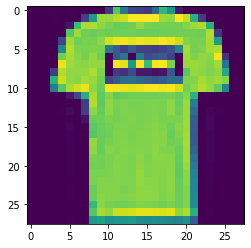

In [15]:
plt.imshow(X_train_full[1])

In [16]:
y_train_full[1]

0

In [17]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [21]:
class_names[y_train_full[1]]

'T-shirt/top'

In [23]:
X_train_full[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

## Data Normalization
##### Normalizing means we have to restrict this pixel intensities between 0 and 1

In [25]:
X_train_n = X_train_full / 255.0
X_test_n = X_test / 255.0

## Split the data into train/validation/test datasets

#### 1. Training Data - used for training the model
#### 2. Validation Data - used for tuning the hyperparameters and evaluate the models
#### 3. Test Data - used to test the model after the model has gone through initial vetting by validation set

In [29]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]

In [30]:
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [31]:
X_test = X_test_n

In [32]:
X_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Create Model Architecture

###### There are two API's for defining a model in Keras
#### 1. Sequential Model API
    Straight forward and simple
    used to create layer by layer model such as where all the outputs of previous layer are connected as inputs of the next layer and so on.
#### Functional API
    complex but give you flexibility to create some complex neural networks
    here input as an input for concat layer as well
    layer has two inputs - : primary parameters + output of hidden layer as well
    

## Random seed set
    used to replicate the same result every time

In [33]:
np.random.seed(42)

In [34]:
tf.random.set_seed(42)

## Model build using Sequential API

    28*28 pixel
    
    InputLayer
    
    Hidden Layer 1 
                        ReLu Activation
    Hidden Layer 2
    
    Output Layer
                        Softmax Activation
    10 Categories

In [35]:
model = keras.models.Sequential()

In [36]:
model.add(keras.layers.Flatten(input_shape=[28,28])) ## Input Layer 

In [37]:
model.add(keras.layers.Dense(300, activation="relu")) ## Hidden Layer 1_______here 300 is no of neurons we want

In [38]:
model.add(keras.layers.Dense(100, activation="relu")) ## Hidden Layer 2 _____ 100-> neurons

In [39]:
model.add(keras.layers.Dense(10, activation="softmax")) ## Output Layer   Uses Softmax as classes are exclusive

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [41]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [42]:
import pydot

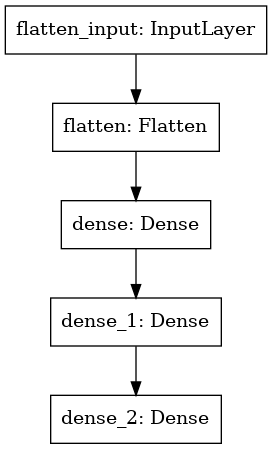

In [43]:
keras.utils.plot_model(model)

In [44]:
weights, biases = model.layers[1].get_weights()

In [45]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [46]:
weights.shape

(784, 300)

In [47]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [48]:
biases.shape

(300,)

In [49]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])  ## Using Loss function as Sparse Categorical Cross Entropy  because our y data is in the form of labels.

In [54]:
model_history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2207 - accuracy: 0.9201 - val_loss: 0.2886 - val_accuracy: 0.8950
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2176 - accuracy: 0.9219 - val_loss: 0.2881 - val_accuracy: 0.8972
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2142 - accuracy: 0.9227 - val_loss: 0.3763 - val_accuracy: 0.8614
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2104 - accuracy: 0.9251 - val_loss: 0.2920 - val_accuracy: 0.8974
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2088 - accuracy: 0.9244 - val_loss: 0.2806 - val_accuracy: 0.8994
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2032 - accuracy: 0.9276 - val_loss: 0.2970 - val_accuracy: 0.8938
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2004 - accuracy: 0.9291 - val_loss: 0.2920 - val_accuracy:

In [55]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [56]:
model_history.history

{'loss': [0.22070753574371338,
  0.21756842732429504,
  0.21420089900493622,
  0.21042685210704803,
  0.20875157415866852,
  0.20324531197547913,
  0.20043592154979706,
  0.19779345393180847,
  0.1940198391675949,
  0.19095173478126526,
  0.18914830684661865,
  0.18457315862178802,
  0.18167147040367126,
  0.17960971593856812,
  0.17652469873428345,
  0.1739436388015747,
  0.17142033576965332,
  0.1684383898973465,
  0.16613461077213287,
  0.16280081868171692,
  0.16032518446445465,
  0.15754453837871552,
  0.15558069944381714,
  0.15300171077251434,
  0.1503141224384308,
  0.14839497208595276,
  0.14578227698802948,
  0.14374017715454102,
  0.14126062393188477,
  0.1386510282754898],
 'accuracy': [0.9200727343559265,
  0.921927273273468,
  0.9226727485656738,
  0.9251454472541809,
  0.9243636131286621,
  0.9275818467140198,
  0.9291090965270996,
  0.9293272495269775,
  0.930436372756958,
  0.9321272969245911,
  0.9319818019866943,
  0.9337636232376099,
  0.9362727403640747,
  0.936072

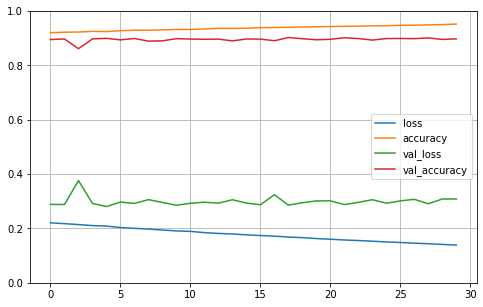

In [59]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## Evaluating the Model

In [60]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3458 - accuracy: 0.8906


[0.34582647681236267, 0.8906000256538391]

## Predict Result using unseen data
    here let the unseen data is first 3 values of test data

In [61]:
X_new = X_test[:3]

In [64]:
y_proba = model.predict(X_new)

In [65]:
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [67]:
y_pred = model.predict_classes(X_new)

In [68]:
y_pred

array([9, 2, 1])

In [69]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


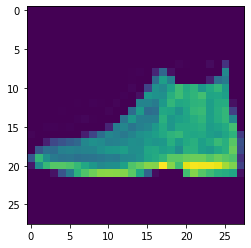

In [70]:
print(plt.imshow(X_test[0]))

AxesImage(54,36;334.8x217.44)


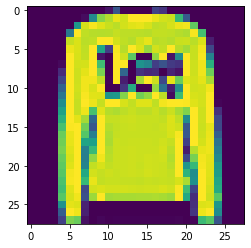

In [71]:
print(plt.imshow(X_test[1]))

AxesImage(54,36;334.8x217.44)


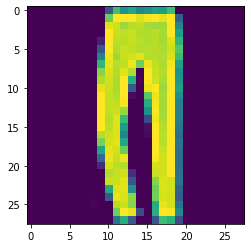

In [72]:
print(plt.imshow(X_test[2]))